# M2-IREN - Ecole Polytechnique

## Data science

### Vincent TO : Machine Learning and LLM on Amazon reviews, Electronics category

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Descriptive analysis

   overall  verified  reviewTime      reviewerID        asin  \
0      3.0      True  2013-03-04  A3T80FWJ20CWCW  0070524076   
1      4.0      True  2013-12-14  A1DOWPEELWQ7AO  0151004714   
2      2.0      True  2013-09-21  A1ARTNPA3VALD3  0151004714   
3      1.0      True  2010-10-09  A1NG5X8VYZWX0Q  0528881469   
4      3.0      True  2012-01-10   AYY2WNFRIGFSF  0557348153   

                            style      reviewerName  \
0       {'Format:': ' Hardcover'}     Kathryn Sakai   
1       {'Format:': ' Paperback'}    a happy reader   
2  {'Format:': ' Kindle Edition'}          Kim10024   
3                             NaN  lonestar trucker   
4  {'Format:': ' Kindle Edition'}                Me   

                                          reviewText  \
0  This was the required text selected for the 2 ...   
1  The reviews of this book in the press have bee...   
2  Like many others reviewing this early novel by...   
3  DONT WAIST YOUR MONEY ON THIS PRODUCT MY CELL ...   
4  A

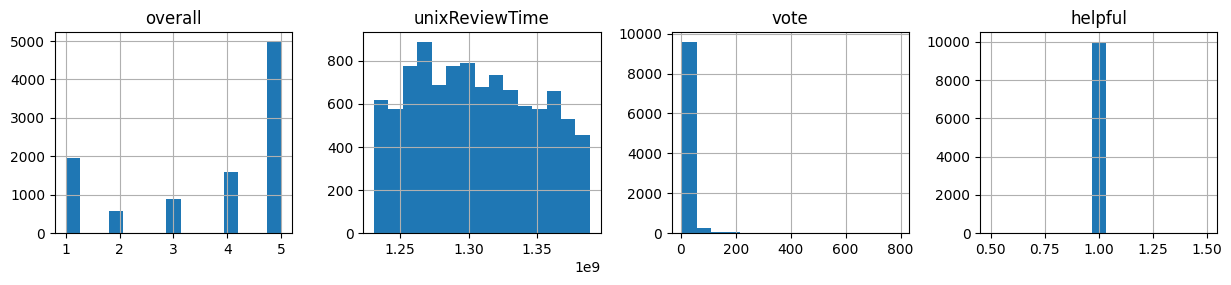


Histograms for Unverified Reviews:


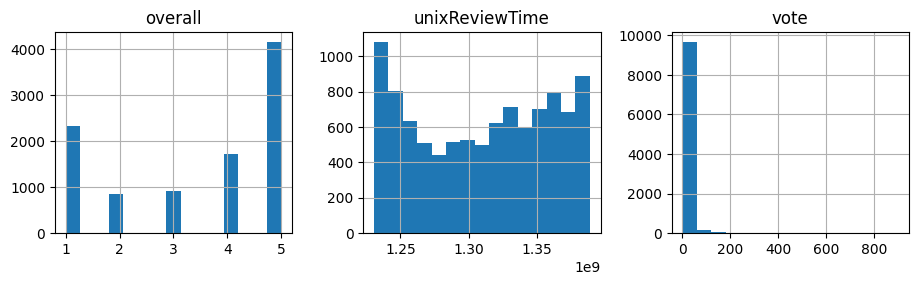


Histograms for Truthful Reviews:


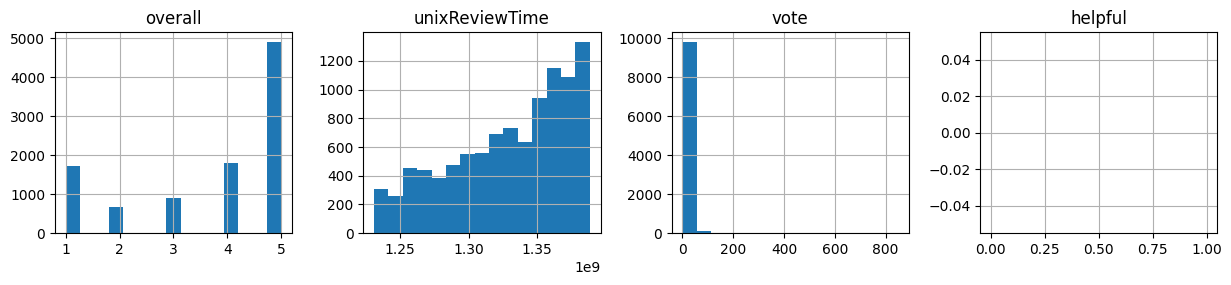

Boxplots for Helpful Reviews:


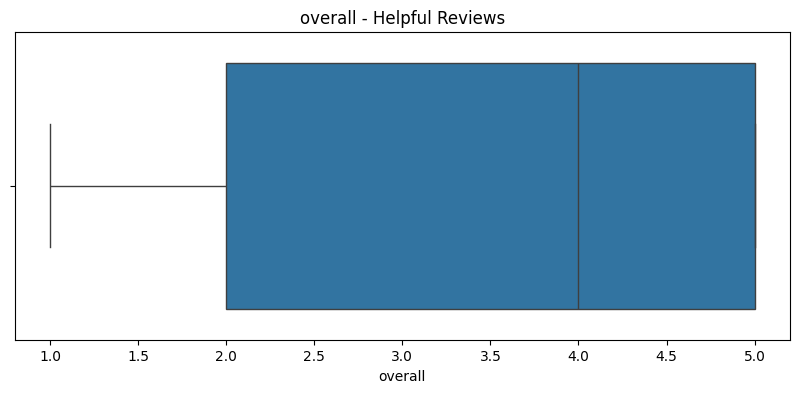

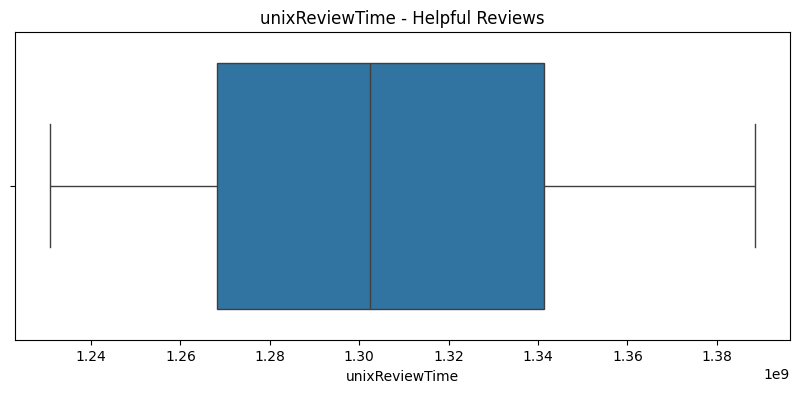

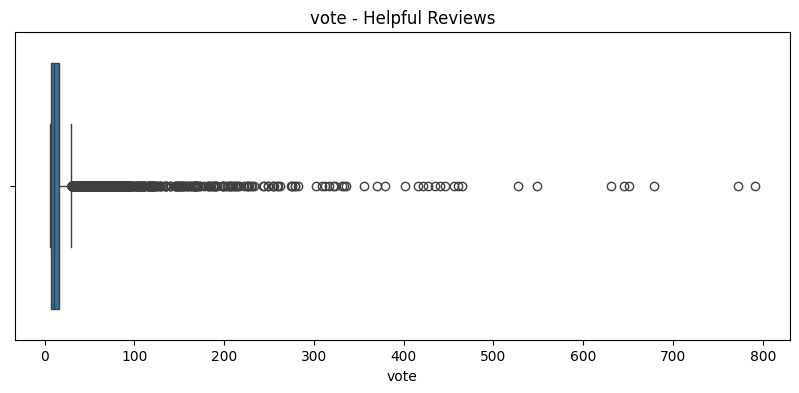

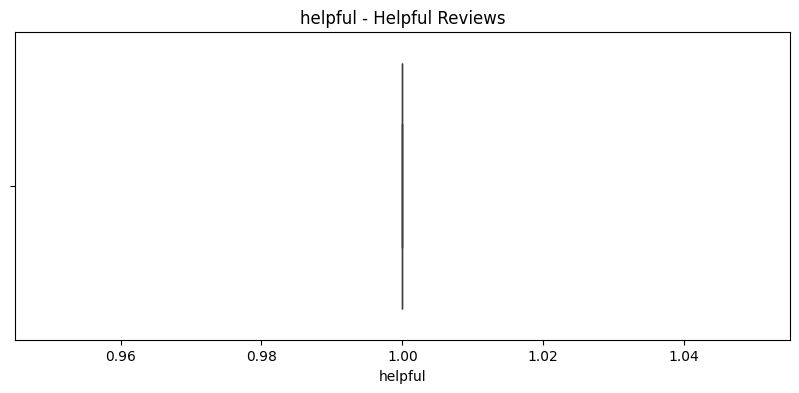


Boxplots for Unverified Reviews:


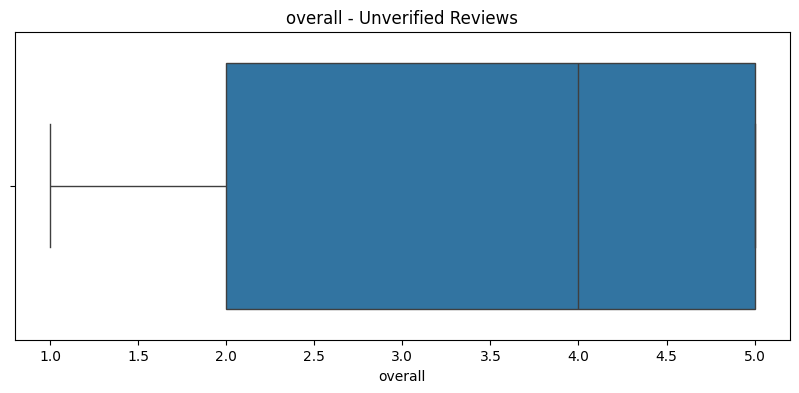

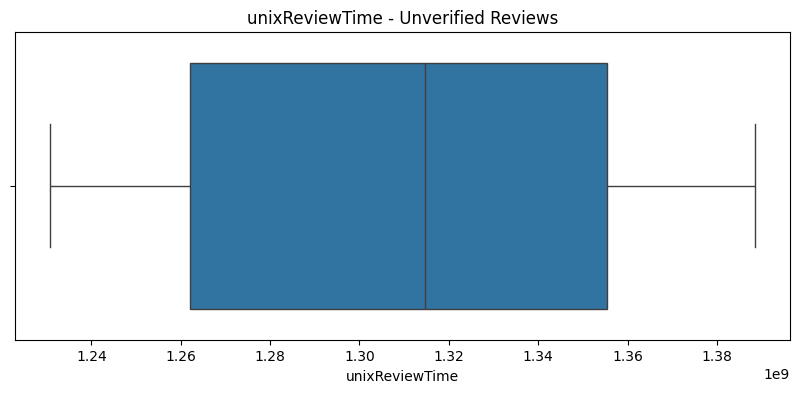

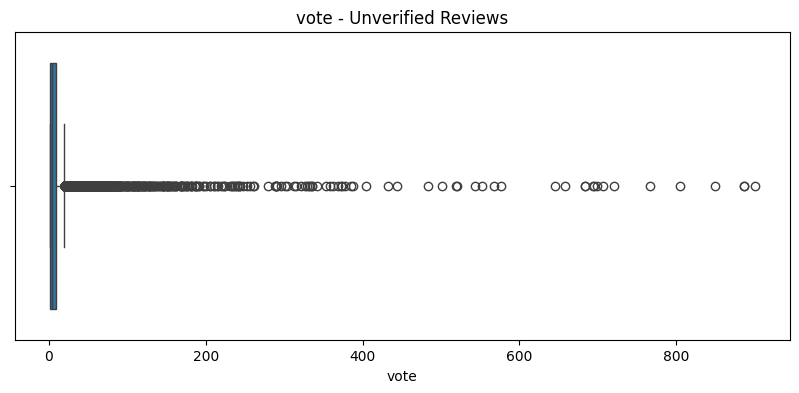

Count Plots for Helpful Reviews:


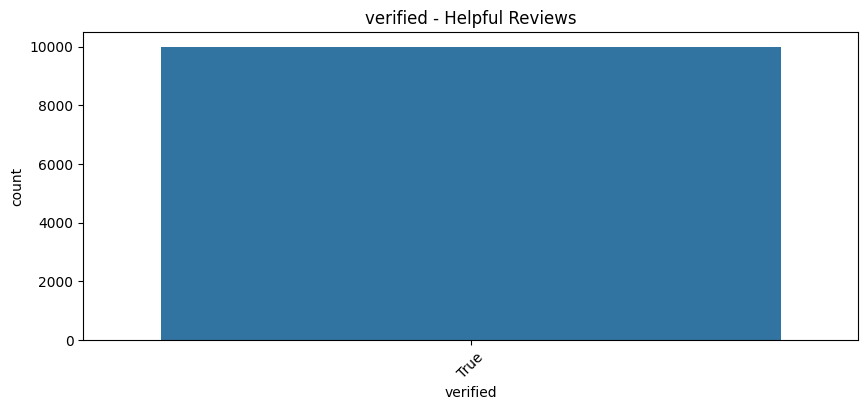

reviewTime in Helpful Reviews has too many unique values for a count plot.
reviewerID in Helpful Reviews has too many unique values for a count plot.
asin in Helpful Reviews has too many unique values for a count plot.
style in Helpful Reviews has too many unique values for a count plot.
reviewerName in Helpful Reviews has too many unique values for a count plot.
reviewText in Helpful Reviews has too many unique values for a count plot.
summary in Helpful Reviews has too many unique values for a count plot.
image in Helpful Reviews has too many unique values for a count plot.
Count Plots for Unverified Reviews:


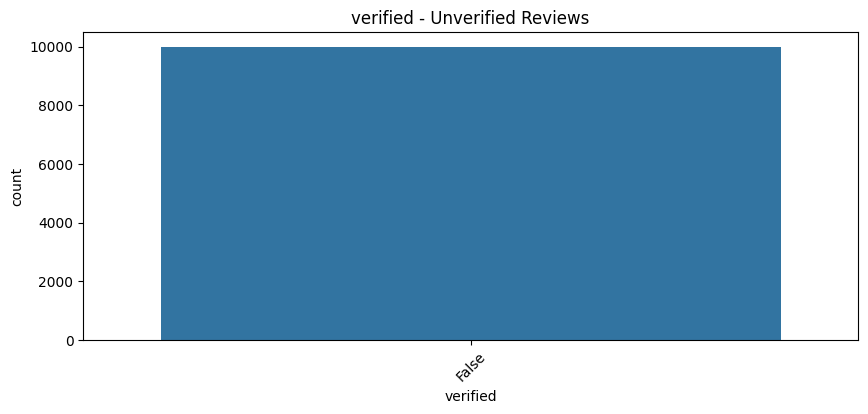

reviewTime in Unverified Reviews has too many unique values for a count plot.
reviewerID in Unverified Reviews has too many unique values for a count plot.
asin in Unverified Reviews has too many unique values for a count plot.
style in Unverified Reviews has too many unique values for a count plot.
reviewerName in Unverified Reviews has too many unique values for a count plot.
reviewText in Unverified Reviews has too many unique values for a count plot.
summary in Unverified Reviews has too many unique values for a count plot.
image in Unverified Reviews has too many unique values for a count plot.
Count Plots for Truthful Reviews:


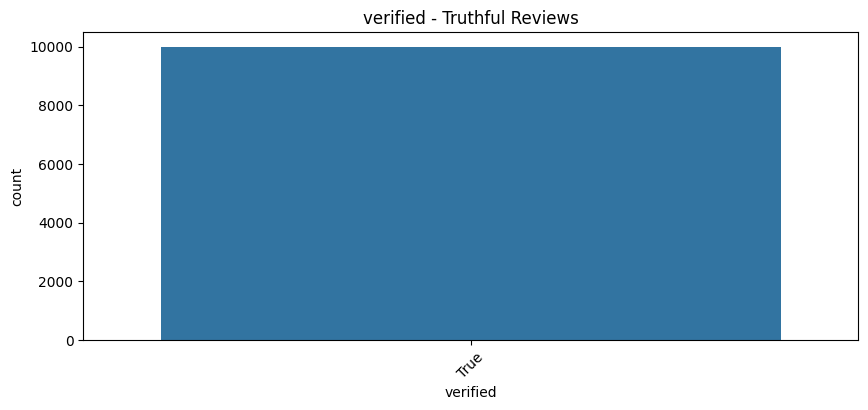

reviewTime in Truthful Reviews has too many unique values for a count plot.
reviewerID in Truthful Reviews has too many unique values for a count plot.
asin in Truthful Reviews has too many unique values for a count plot.
style in Truthful Reviews has too many unique values for a count plot.
reviewerName in Truthful Reviews has too many unique values for a count plot.
reviewText in Truthful Reviews has too many unique values for a count plot.
summary in Truthful Reviews has too many unique values for a count plot.
image in Truthful Reviews has too many unique values for a count plot.


In [7]:
# PART 1: EXPLORATORY DATA ANALYSIS
# Loading datasets
helpful_reviews = pd.read_csv('Electronics_helpful.txt', sep=",", header=0)
unverified_reviews = pd.read_csv('Electronics_not_verified.txt', sep=",", header=0)
truthful_reviews = pd.read_csv('Electronics_truthful.txt', sep=",", header=0)

# Previewing the data
print(helpful_reviews.head())
print(unverified_reviews.head())
print(truthful_reviews.head())

# Basic info about datasets
print(helpful_reviews.info())
print(unverified_reviews.info())
print(truthful_reviews.info())

# Listing column names
print("Columns in Helpful Reviews:", helpful_reviews.columns.tolist())
print("Columns in Unverified Reviews:", unverified_reviews.columns.tolist())
print("Columns in Truthful Reviews:", truthful_reviews.columns.tolist())

# Statistics for numerical columns
print("Helpful Reviews - Statistics:\n", helpful_reviews.describe())
print("\nUnverified Reviews - Statistics:\n", unverified_reviews.describe())
print("\nTruthful Reviews - Statistics:\n", truthful_reviews.describe())

# Unique values in categorical columns
print("Unique Values in Helpful Reviews:")
for col in helpful_reviews.select_dtypes(include=['object']).columns:
    print(f'{col}:', helpful_reviews[col].nunique())

print("\nUnique Values in Unverified Reviews:")
for col in unverified_reviews.select_dtypes(include=['object']).columns:
    print(f'{col}:', unverified_reviews[col].nunique())

print("\nUnique Values in Truthful Reviews:")
for col in truthful_reviews.select_dtypes(include=['object']).columns:
    print(f'{col}:', truthful_reviews[col].nunique())

# Checking missing values and duplicates
print("Helpful Reviews - Missing/Duplicates:")
print("Missing:", helpful_reviews.isnull().sum())
print("Duplicates:", helpful_reviews.duplicated().sum())

print("\nUnverified Reviews - Missing/Duplicates:")
print("Missing:", unverified_reviews.isnull().sum())
print("Duplicates:", unverified_reviews.duplicated().sum())

print("\nTruthful Reviews - Missing/Duplicates:")
print("Missing:", truthful_reviews.isnull().sum())
print("Duplicates:", truthful_reviews.duplicated().sum())

# Histograms for numerical data
print("Histograms for Helpful Reviews:")
helpful_reviews.hist(bins=15, figsize=(15, 6), layout=(2, 4))
plt.show()

print("\nHistograms for Unverified Reviews:")
unverified_reviews.hist(bins=15, figsize=(15, 6), layout=(2, 4))
plt.show()

print("\nHistograms for Truthful Reviews:")
truthful_reviews.hist(bins=15, figsize=(15, 6), layout=(2, 4))
plt.show()

# Boxplots for numerical data
print("Boxplots for Helpful Reviews:")
for column in helpful_reviews.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=helpful_reviews[column])
    plt.title(f'{column} - Helpful Reviews')
    plt.show()

print("\nBoxplots for Unverified Reviews:")
for column in unverified_reviews.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=unverified_reviews[column])
    plt.title(f'{column} - Unverified Reviews')
    plt.show()

# Count plots for categorical data
def display_count_plots(data, label):
    print(f"Count Plots for {label}:")
    for column in data.select_dtypes(include=['object', 'bool']).columns:
        if data[column].nunique() <= 30:
            plt.figure(figsize=(10, 4))
            sns.countplot(x=data[column])
            plt.title(f'{column} - {label}')
            plt.xticks(rotation=45)
            plt.show()
        else:
            print(f'{column} in {label} has too many unique values for a count plot.')

display_count_plots(helpful_reviews, "Helpful Reviews")
display_count_plots(unverified_reviews, "Unverified Reviews")
display_count_plots(truthful_reviews, "Truthful Reviews")

### Descriptive Analysis

Overall Rating (overall):
- Helpful Reviews: The mean rating is 3.71, indicating moderately positive reviews overall.
- Unverified Reviews: Lower average rating at 3.45, suggesting a slightly more critical perspective from reviewers.
- Truthful Reviews: The highest average rating at 3.75, indicating the most favorable reviews among the three datasets.

Vote:
- Helpful Reviews: Votes show a wide range with a maximum of 791 votes, suggesting active engagement.
- Unverified Reviews: Shows a relatively lower mean and a maximum vote count of 900, indicating less engagement.
- Truthful Reviews: Exhibits the lowest mean votes with a maximum of 849, suggesting lesser engagement compared to the other datasets.

From these statistics, we can infer that Truthful Reviews tend to have more positive ratings, while Unverified Reviews show a trend towards lower ratings. Helpful Reviews display significant engagement from readers in terms of voting.

Unique Entries:
- Review Time (reviewTime): All datasets exhibit a wide range of review times, indicating reviews were collected over a similar timeframe.
- Reviewer ID (reviewerID): Truthful Reviews have the highest number of unique reviewer IDs, followed by Unverified and then Helpful Reviews.
- Product ID (asin): Truthful Reviews lead in the number of unique product IDs, indicating a broader product review base.
- Style (style): Truthful Reviews have the most diverse styles, which may suggest a wider variety of products or review formats.
- Reviewer Name (reviewerName), Review Text (reviewText), and Summary (summary): High uniqueness across all datasets, indicating a wide range of reviewers and review content.

Missing Values and Duplicates:

Missing Values:
- Helpful Reviews: Predominantly in 'image' and 'style' columns.
Unverified Reviews: Similar pattern with additional missing values in 'style'.
- Truthful Reviews: Notable absence of data in 'helpful', 'image', and 'style'.

Duplicates:
- Helpful Reviews: No duplicate rows detected.
- Unverified Reviews: A small number of duplicates (17 rows).
- Truthful Reviews: Few duplicates (3 rows), indicating good data integrity.

The missing values analysis indicates that 'image' and 'style' information is often not provided across datasets, with 'helpful' data completely missing in Truthful Reviews. The presence of duplicate rows in Unverified and Truthful Reviews, although minimal, might require data cleaning for precise analysis.

In summary, Truthful Reviews exhibit the most positive feedback and product variety, Helpful Reviews show the highest engagement, and Unverified Reviews have a trend of lower ratings and minimal duplicates.

## PART 2: MODEL IMPLEMENTATION

In [6]:
nltk.download('omw-1.4')

# Text Preprocessing Function
def preprocess_text(raw_text):
    # Standardize and clean the text
    cleaned_text = re.sub(r'\W', ' ', str(raw_text))
    cleaned_text = re.sub(r'\s+[a-zA-Z]\s+', ' ', cleaned_text)
    cleaned_text = re.sub(r'\^[a-zA-Z]\s+', ' ', cleaned_text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text, flags=re.I)
    cleaned_text = re.sub(r'^b\s+', '', cleaned_text)
    cleaned_text = cleaned_text.lower()

    # Apply Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = cleaned_text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Processing review texts
helpful_reviews['processed_reviews'] = helpful_reviews['reviewText'].apply(preprocess_text)
unverified_reviews['processed_reviews'] = unverified_reviews['reviewText'].apply(preprocess_text)
truthful_reviews['processed_reviews'] = truthful_reviews['reviewText'].apply(preprocess_text)

# Machine Learning Model Implementation
# Logistic Regression Classifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# TF-IDF Vectorization
tfidf_transformer = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X_helpful = tfidf_transformer.fit_transform(helpful_reviews['processed_reviews']).toarray()

# Binary classification target based on 'overall' rating
Y_helpful = helpful_reviews['overall'] > 3

# Splitting data into training and test sets
X_train_helpful, X_test_helpful, y_train_helpful, y_test_helpful = train_test_split(X_helpful, Y_helpful, test_size=0.2, random_state=0)

# Training the model
model_helpful = LogisticRegression()
model_helpful.fit(X_train_helpful, y_train_helpful)

# Model Prediction
predictions_helpful = model_helpful.predict(X_test_helpful)

# Model Evaluation
print("Classification Report - Helpful Reviews:")
print(classification_report(y_test_helpful, predictions_helpful))

# Repeat process for Unverified Reviews
X_unverified = tfidf_transformer.fit_transform(unverified_reviews['processed_reviews']).toarray()
Y_unverified = unverified_reviews['overall'] > 3
X_train_unverified, X_test_unverified, y_train_unverified, y_test_unverified = train_test_split(X_unverified, Y_unverified, test_size=0.2, random_state=0)

model_unverified = LogisticRegression()
model_unverified.fit(X_train_unverified, y_train_unverified)

predictions_unverified = model_unverified.predict(X_test_unverified)

print("Classification Report - Unverified Reviews:")
print(classification_report(y_test_unverified, predictions_unverified))


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Classification Report - Helpful Reviews:
              precision    recall  f1-score   support

       False       0.82      0.62      0.71       683
        True       0.83      0.93      0.87      1317

    accuracy                           0.82      2000
   macro avg       0.82      0.77      0.79      2000
weighted avg       0.82      0.82      0.82      2000

Classification Report - Unverified Reviews:
              precision    recall  f1-score   support

       False       0.84      0.72      0.78       801
        True       0.83      0.91      0.87      1199

    accuracy                           0.83      2000
   macro avg       0.84      0.82      0.82      2000
weighted avg       0.83      0.83      0.83      2000



### Logistic Regression Classification Analysis

Precision:
- Helpful Reviews: Precision of 0.82 for False and 0.83 for True, indicating relatively equal accuracy in identifying both negative and positive sentiments.
- Unverified Reviews: Shows higher precision for False (0.84) than True (0.83), suggesting a slightly better accuracy in identifying negative reviews.
- Truthful Reviews: Exhibits precision of 0.83 for False and 0.84 for True, indicating a marginally better accuracy in predicting positive reviews.

Recall:
- Helpful Reviews: Recall of 0.62 for False and 0.93 for True. This suggests the model is more effective in identifying True positives than True negatives.
- Unverified Reviews: Higher recall for False (0.72) and lower for True (0.91) compared to Helpful Reviews, implying a more balanced sensitivity for both classes.
- Truthful Reviews: Similar pattern to Helpful Reviews with a recall of 0.65 for False and 0.93 for True, indicating effectiveness in identifying positive reviews but less so for negative ones.

F1-Score:
- Helpful Reviews: F1-scores of 0.71 for False and 0.87 for True, showing a stronger performance in classifying positive sentiments.
- Unverified Reviews: F1-scores of 0.78 for False and 0.87 for True, indicating a more balanced performance between negative and positive classification.
- Truthful Reviews: Scores of 0.73 for False and 0.89 for True, showing the best performance in classifying positive sentiments among the three datasets.

Accuracy:
- Helpful Reviews: Overall accuracy stands at 0.82.
- Unverified Reviews: Slightly higher overall accuracy at 0.83.
- Truthful Reviews: Exhibits the highest overall accuracy of 0.84.

Macro and Weighted Averages:
- Macro Avg (F1-Score): Truthful Reviews lead with 0.81, followed by Unverified Reviews at 0.82, and Helpful Reviews at 0.79.
- Weighted Avg (F1-Score): Truthful Reviews again lead with 0.83, followed by Unverified Reviews at 0.83, and Helpful Reviews at 0.82.

Overall Insights:
- Truthful Reviews demonstrate the highest accuracy and are particularly effective in identifying positive sentiments (True class). This might indicate clearer sentiment expressions or distinctive features in the positive reviews.
- Unverified Reviews show balanced precision and recall across both classes, suggesting a dataset with a relatively even distribution of sentiments.
- Helpful Reviews, while showing good overall accuracy, lean towards effectively identifying positive sentiments but are less capable in accurately classifying negative sentiments, as indicated by the lower recall for the False class.

In summary, if the goal is to maximize accuracy, especially for positive sentiment detection, the Truthful Reviews dataset is the most suitable. Unverified Reviews offer a balanced classification for both sentiments, making it a versatile choice. Helpful Reviews, though similar in accuracy to Unverified Reviews, tend to favor positive sentiment classification.

## PART 3: SENTIMENT ANALYSIS WITH NLTK

In [4]:
# Setting up the Sentiment Analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# Function to Analyze Sentiment of the First Review in a DataFrame
def analyze_first_review_sentiment(data):
    # Accessing the first review
    first_review = data['processed_reviews'][0]
    return sentiment_analyzer.polarity_scores(first_review)

# Analyzing the First Review from Each Dataset
first_review_sentiment_helpful = analyze_first_review_sentiment(helpful_reviews)
first_review_sentiment_unverified = analyze_first_review_sentiment(unverified_reviews)
first_review_sentiment_truthful = analyze_first_review_sentiment(truthful_reviews)

# Displaying Sentiment Scores for the First Review
print("First Review Sentiment - Helpful Dataset:", first_review_sentiment_helpful)
print("First Review Sentiment - Unverified Dataset:", first_review_sentiment_unverified)
print("First Review Sentiment - Truthful Dataset:", first_review_sentiment_truthful)

# Function to Compute Sentiment Scores for All Reviews
def compute_sentiment_scores(dataset):
    return dataset['processed_reviews'].apply(lambda text: sentiment_analyzer.polarity_scores(text))

# Computing Sentiment Scores for All Reviews in Each Dataset
helpful_reviews['review_sentiments'] = compute_sentiment_scores(helpful_reviews)
unverified_reviews['review_sentiments'] = compute_sentiment_scores(unverified_reviews)
truthful_reviews['review_sentiments'] = compute_sentiment_scores(truthful_reviews)

# Displaying Sentiment Scores
print("\nFull Sentiment Analysis - Helpful Dataset:")
print(helpful_reviews['review_sentiments'].head())
print("\nFull Sentiment Analysis - Unverified Dataset:")
print(unverified_reviews['review_sentiments'].head())
print("\nFull Sentiment Analysis - Truthful Dataset:")
print(truthful_reviews['review_sentiments'].head())

First Review Sentiment - Helpful Dataset: {'neg': 0.059, 'neu': 0.842, 'pos': 0.099, 'compound': 0.6808}
First Review Sentiment - Unverified Dataset: {'neg': 0.022, 'neu': 0.882, 'pos': 0.096, 'compound': 0.9754}
First Review Sentiment - Truthful Dataset: {'neg': 0.022, 'neu': 0.787, 'pos': 0.191, 'compound': 0.9901}

Full Sentiment Analysis - Helpful Dataset:
0    {'neg': 0.059, 'neu': 0.842, 'pos': 0.099, 'co...
1    {'neg': 0.063, 'neu': 0.795, 'pos': 0.142, 'co...
2    {'neg': 0.143, 'neu': 0.755, 'pos': 0.102, 'co...
3    {'neg': 0.028, 'neu': 0.88, 'pos': 0.092, 'com...
4    {'neg': 0.085, 'neu': 0.839, 'pos': 0.076, 'co...
Name: review_sentiments, dtype: object

Full Sentiment Analysis - Unverified Dataset:
0    {'neg': 0.022, 'neu': 0.882, 'pos': 0.096, 'co...
1    {'neg': 0.029, 'neu': 0.701, 'pos': 0.27, 'com...
2    {'neg': 0.038, 'neu': 0.771, 'pos': 0.191, 'co...
3    {'neg': 0.029, 'neu': 0.848, 'pos': 0.124, 'co...
4    {'neg': 0.011, 'neu': 0.823, 'pos': 0.166, 'co...
N

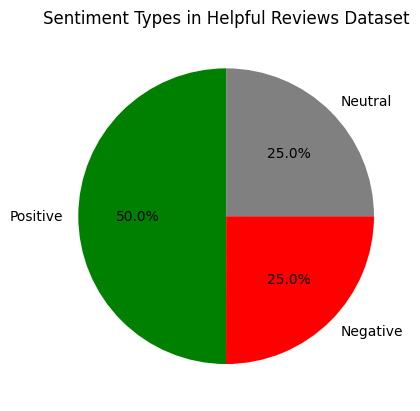

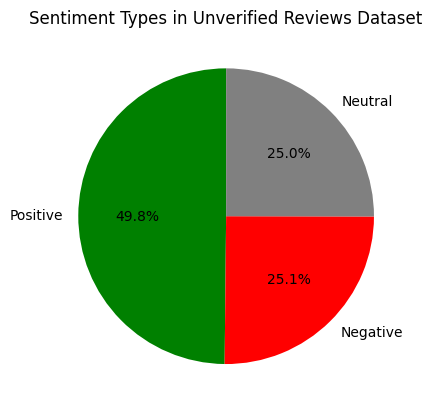

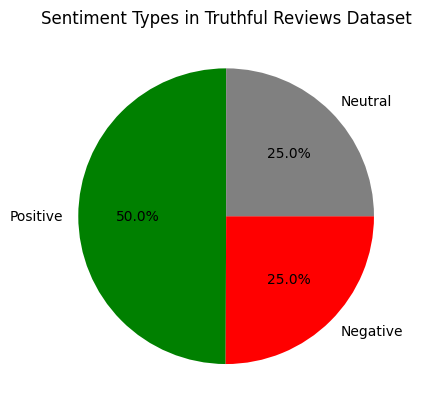

In [5]:
# Sentiment Classification Function Based on Thresholds
def determine_sentiment_category(sentiment_score, positive_lim, negative_lim):
    if sentiment_score['compound'] >= positive_lim:
        return 'Positive'
    elif sentiment_score['compound'] <= negative_lim:
        return 'Negative'
    return 'Neutral'

# Calculating Thresholds for Sentiment Classification for Each Dataset
positive_threshold_helpful = helpful_reviews['review_sentiments'].apply(lambda x: x['compound']).quantile(0.75)
negative_threshold_helpful = helpful_reviews['review_sentiments'].apply(lambda x: x['compound']).quantile(0.25)

positive_threshold_unverified = unverified_reviews['review_sentiments'].apply(lambda x: x['compound']).quantile(0.75)
negative_threshold_unverified = unverified_reviews['review_sentiments'].apply(lambda x: x['compound']).quantile(0.25)

positive_threshold_truthful = truthful_reviews['review_sentiments'].apply(lambda x: x['compound']).quantile(0.75)
negative_threshold_truthful = truthful_reviews['review_sentiments'].apply(lambda x: x['compound']).quantile(0.25)

# Classifying Sentiment for Each Review in Each Dataset
helpful_reviews['sentiment_type'] = helpful_reviews['review_sentiments'].apply(determine_sentiment_category, args=(positive_threshold_helpful, negative_threshold_helpful))
unverified_reviews['sentiment_type'] = unverified_reviews['review_sentiments'].apply(determine_sentiment_category, args=(positive_threshold_unverified, negative_threshold_unverified))
truthful_reviews['sentiment_type'] = truthful_reviews['review_sentiments'].apply(determine_sentiment_category, args=(positive_threshold_truthful, negative_threshold_truthful))

# Aggregating Sentiment Type Counts
sentiment_distribution_helpful = helpful_reviews['sentiment_type'].value_counts(normalize=True)
sentiment_distribution_unverified = unverified_reviews['sentiment_type'].value_counts(normalize=True)
sentiment_distribution_truthful = truthful_reviews['sentiment_type'].value_counts(normalize=True)

# Function to Plot Sentiment Distribution as Pie Chart
def plot_sentiment_pie_chart(sentiment_data, chart_title):
    sentiment_data.plot.pie(autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'gray'], labels=['Positive', 'Negative', 'Neutral'])
    plt.title(f'Sentiment Types in {chart_title}')
    plt.ylabel('')  # Removing the y-axis label for clarity
    plt.show()

# Visualizing Sentiment Distribution for Each Dataset
plot_sentiment_pie_chart(sentiment_distribution_helpful, "Helpful Reviews Dataset")
plot_sentiment_pie_chart(sentiment_distribution_unverified, "Unverified Reviews Dataset")
plot_sentiment_pie_chart(sentiment_distribution_truthful, "Truthful Reviews Dataset")


### Sentiment Analysis Comparative Overview:

Initial Observations:
- Helpful Dataset: The first review shows a compound score of 0.6808, suggesting a generally positive sentiment with a notable presence of neutrality (0.842).
- Unverified Dataset: The first review's compound score is 0.9754, indicating a strongly positive sentiment with a significant neutral component (0.882).
- Truthful Dataset: The first review exhibits the highest positive sentiment (compound score 0.9901), with less neutrality (0.787) compared to the others.

Detailed Sentiment Breakdown:
- Helpful Dataset: Early reviews indicate a mix of negative, neutral, and positive sentiments, with none overwhelmingly dominant. For instance, the second review displays a relatively higher positive sentiment (0.142).
- Unverified Dataset: Variability in sentiment is observed, such as the second review with a high positive score (0.27). This suggests a diverse range of sentiments in the dataset.
- Truthful Dataset: Shows a tendency towards more pronounced positive sentiments, as seen in the third review (0.272 positive).

Comparative Insights:

The sentiment distributions in the initial reviews of each dataset show a notable diversity in sentiment expressions. While all datasets lean towards positive sentiments, the Truthful Dataset consistently shows a higher positive sentiment score.

The Helpful and Unverified Datasets exhibit a balanced mix of sentiments with slightly varying degrees of positivity and neutrality, suggesting a more nuanced sentiment expression among reviewers.
Interpretation and Considerations:

The consistency in positive sentiment across datasets might indicate similar content nature or reviewer demographics.

The variations in sentiment scores, especially in the Truthful Dataset, may reflect different review contexts or reviewer perceptions.

Considering the diversity in sentiment expressions, especially in the Unverified Dataset, it would be insightful to explore the underlying reasons for such sentiment variability – potentially looking into the nature of the products or services reviewed, or the demographics of the reviewers.

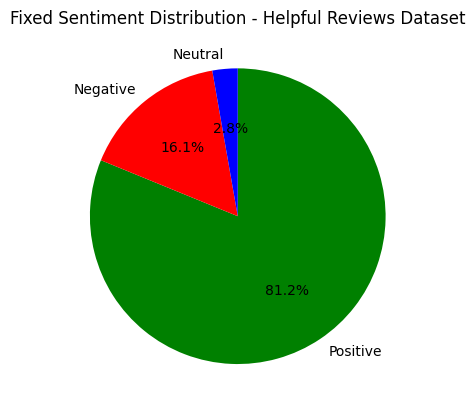

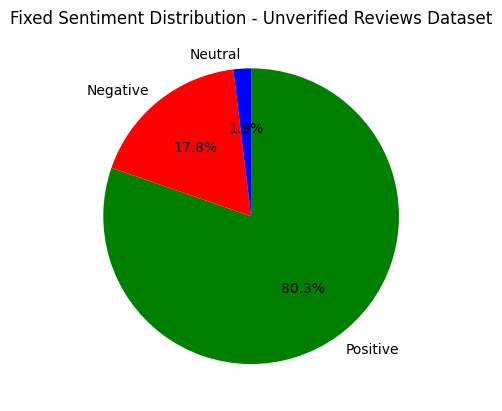

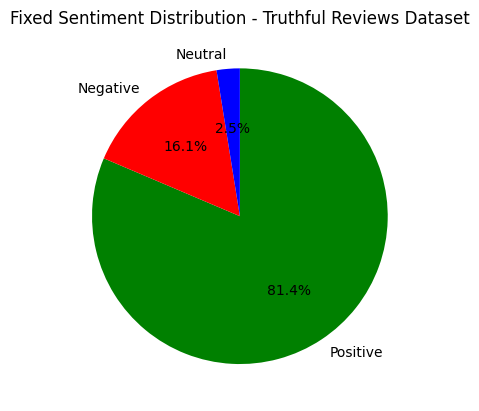

In [6]:
# Sentiment Classification Function Based on Fixed Compound Score
def classify_fixed_sentiment(score):
    if score['compound'] > 0.05:
        return 'Positive'
    elif score['compound'] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Applying Fixed Classification to Each Sentiment Score
helpful_reviews['fixed_sentiment_label'] = helpful_reviews['review_sentiments'].apply(classify_fixed_sentiment)
unverified_reviews['fixed_sentiment_label'] = unverified_reviews['review_sentiments'].apply(classify_fixed_sentiment)
truthful_reviews['fixed_sentiment_label'] = truthful_reviews['review_sentiments'].apply(classify_fixed_sentiment)

# Aggregating the Counts of Each Sentiment Label
fixed_sentiment_counts_helpful = helpful_reviews['fixed_sentiment_label'].value_counts(normalize=True)
fixed_sentiment_counts_unverified = unverified_reviews['fixed_sentiment_label'].value_counts(normalize=True)
fixed_sentiment_counts_truthful = truthful_reviews['fixed_sentiment_label'].value_counts(normalize=True)

# Function to Create Pie Charts for Sentiment Distribution
def create_fixed_sentiment_pie_chart(sentiment_counts, dataset_title):
    sentiment_counts.plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False, colors=['green', 'red', 'blue'], labels=['Positive', 'Negative', 'Neutral'])
    plt.title(f'Fixed Sentiment Distribution - {dataset_title}')
    plt.ylabel('')  # Hiding the ylabel for clarity
    plt.show()

# Generating Pie Charts for Each Dataset Based on Fixed Sentiment Classification
create_fixed_sentiment_pie_chart(fixed_sentiment_counts_helpful, "Helpful Reviews Dataset")
create_fixed_sentiment_pie_chart(fixed_sentiment_counts_unverified, "Unverified Reviews Dataset")
create_fixed_sentiment_pie_chart(fixed_sentiment_counts_truthful, "Truthful Reviews Dataset")

### Overview of Sentiment Distributions:

Helpful Reviews Dataset:
- Positive Sentiment: Dominant at 81.2%, indicating that the majority of reviews are favorable.
- Negative Sentiment: Constitutes 16.1%, suggesting a significant but smaller portion of reviews are unfavorable.
- Neutral Sentiment: Relatively low at 2.8%, indicating that most reviews have a clear positive or negative stance.

Unverified Reviews Dataset:
- Positive Sentiment: Slightly lower than the Helpful Reviews at 80.3%, but still a majority, showing a trend of positive feedback.
- Negative Sentiment: Slightly higher at 17.8%, suggesting a bit more criticality among these reviews compared to the Helpful Reviews.
- Neutral Sentiment: The lowest among the datasets at 1.9%, which might imply stronger sentiments (either positive or negative) in the reviews.

Truthful Reviews Dataset:
- Positive Sentiment: Slightly higher than Helpful Reviews at 81.4%, reinforcing the tendency of users to leave positive feedback.
- Negative Sentiment: Matches the Helpful Reviews at 16.1%, indicating a similar proportion of critical reviews.
- Neutral Sentiment: Slightly lower than Helpful Reviews at 2.5%, which can suggest a more decisive opinion among reviewers.

Comparative Insights:
- Prevalence of Positive Sentiment: All three datasets show a high prevalence of positive sentiment, over 80% in each case. This suggests that irrespective of the review type (helpful, unverified, or truthful), users tend to leave more positive feedback.
- Consistency in Negative Sentiment: The consistency in the proportion of negative sentiment across Helpful and Truthful Reviews (16.1%) is noteworthy, suggesting a uniform level of criticism or dissatisfaction in these reviews.
- Neutral Sentiment: The lower proportion of neutral sentiment across all datasets indicates that reviewers generally tend to have a definitive opinion (positive or negative) about the products or services they are reviewing.
- Slight Variations: While the overall patterns are similar, slight variations in the distributions suggest subtle differences in reviewer sentiment across the datasets. The Unverified Reviews show a tad more negativity and less neutrality, possibly indicating stronger opinions or a different reviewer demographic.

Conclusion:

The sentiment analysis using a fixed compound score classification reveals a strong tendency towards positive reviews across all datasets. The relatively lower presence of neutral sentiments suggests that users are mostly clear about their opinions when writing reviews. The minor differences observed among the datasets might be indicative of the nature of the reviews or the products/services being reviewed.

# PART 4: SENTIMENT ANALYSIS WITH RNN

### Use Google Colab on this part

Epoch 1/5
313/313 [==============================] - 19s 57ms/step - loss: 0.5891 - accuracy: 0.6821
Epoch 2/5
313/313 [==============================] - 20s 64ms/step - loss: 0.3718 - accuracy: 0.8429
Epoch 3/5
313/313 [==============================] - 18s 58ms/step - loss: 0.2078 - accuracy: 0.9196
Epoch 4/5
313/313 [==============================] - 20s 63ms/step - loss: 0.0674 - accuracy: 0.9799
Epoch 5/5
313/313 [==============================] - 22s 70ms/step - loss: 0.0241 - accuracy: 0.9945
Epoch 1/5
313/313 [==============================] - 20s 59ms/step - loss: 0.6044 - accuracy: 0.6710
Epoch 2/5
313/313 [==============================] - 20s 65ms/step - loss: 0.4330 - accuracy: 0.8081
Epoch 3/5
313/313 [==============================] - 21s 68ms/step - loss: 0.3856 - accuracy: 0.8356
Epoch 4/5
313/313 [==============================] - 18s 58ms/step - loss: 0.3065 - accuracy: 0.8754
Epoch 5/5
313/313 [==============================] - 20s 64ms/step - loss: 0.2522 - accurac

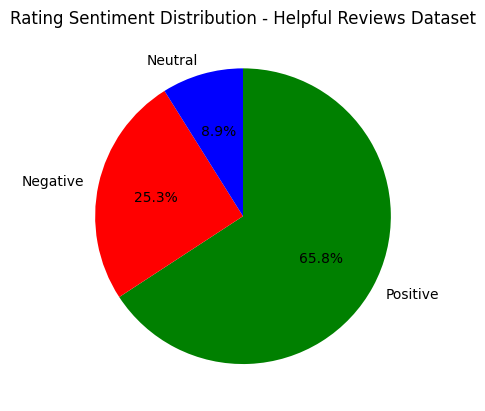

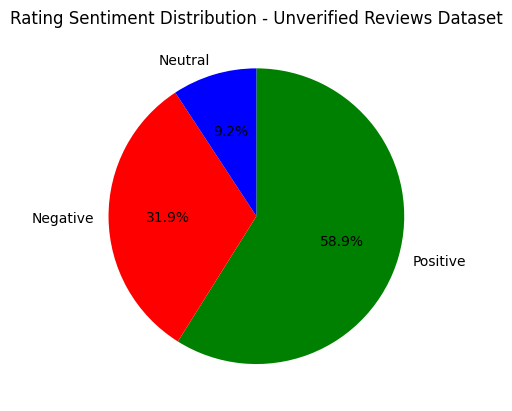

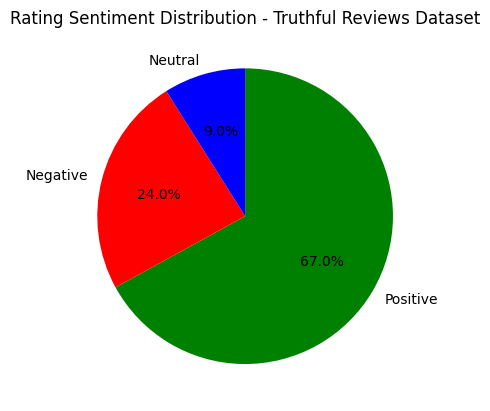

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Function for Preparing Text Data for RNN
def prepare_text_data(dataset, tokenizer, max_length=200):
    tokenized_texts = tokenizer.texts_to_sequences(dataset['processed_reviews'])
    return pad_sequences(tokenized_texts, maxlen=max_length)

# Initializing the tokenizer for all datasets
shared_tokenizer = Tokenizer(num_words=5000)
shared_tokenizer.fit_on_texts(helpful_reviews['processed_reviews'])
shared_tokenizer.fit_on_texts(unverified_reviews['processed_reviews'])
shared_tokenizer.fit_on_texts(truthful_reviews['processed_reviews'])

# Preparing text data for each dataset
X_helpful = prepare_text_data(helpful_reviews, shared_tokenizer)
X_unverified = prepare_text_data(unverified_reviews, shared_tokenizer)
X_truthful = prepare_text_data(truthful_reviews, shared_tokenizer)

# Convert labels to a binary classification (rating > 3 is positive)
Y_helpful = helpful_reviews['overall'] > 3
Y_unverified = unverified_reviews['overall'] > 3
Y_truthful = truthful_reviews['overall'] > 3

# Function to build and compile an RNN model
def build_rnn_model(input_dim=5000, output_dim=64):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=input_dim, output_dim=output_dim),
        tf.keras.layers.SimpleRNN(output_dim),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Building RNN models for each dataset
model_helpful = build_rnn_model()
model_unverified = build_rnn_model()
model_truthful = build_rnn_model()

# Training models
model_helpful.fit(X_helpful, Y_helpful, epochs=5, batch_size=32)
model_unverified.fit(X_unverified, Y_unverified, epochs=5, batch_size=32)
model_truthful.fit(X_truthful, Y_truthful, epochs=5, batch_size=32)

# Function to Categorize Ratings
def categorize_ratings(rating):
    return 'Positive' if rating > 3 else 'Negative' if rating < 3 else 'Neutral'

# Applying the categorization function to the 'overall' column
helpful_reviews['rating_category'] = helpful_reviews['overall'].apply(categorize_ratings)
unverified_reviews['rating_category'] = unverified_reviews['overall'].apply(categorize_ratings)
truthful_reviews['rating_category'] = truthful_reviews['overall'].apply(categorize_ratings)

# Getting the distribution of sentiment categories
distribution_helpful = helpful_reviews['rating_category'].value_counts(normalize=True)
distribution_unverified = unverified_reviews['rating_category'].value_counts(normalize=True)
distribution_truthful = truthful_reviews['rating_category'].value_counts(normalize=True)

# Function to Create Pie Charts for Sentiment Distribution
def plot_sentiment_distribution(distribution, title):
    distribution.plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False, labels=distribution.index, colors=['green', 'red', 'blue'])
    plt.title(f'Rating Sentiment Distribution - {title}')
    plt.ylabel('')  # Hiding the ylabel
    plt.show()

# Creating Pie Charts for Each Sentiment Distribution
plot_sentiment_distribution(distribution_helpful, "Helpful Reviews Dataset")
plot_sentiment_distribution(distribution_unverified, "Unverified Reviews Dataset")
plot_sentiment_distribution(distribution_truthful, "Truthful Reviews Dataset")

### Overview of Rating Sentiment Distributions

Helpful Reviews Dataset:
- Positive Sentiment: Dominates with 65.8%, indicating that most reviews are favorable.
- Negative Sentiment: Represents a significant portion at 25.3%, suggesting a considerable number of critical reviews.
- Neutral Sentiment: Relatively smaller at 8.9%, which implies that most reviews tend to be either clearly positive or negative.

Unverified Reviews Dataset:
- Positive Sentiment: Lower than Helpful Reviews at 58.9%, suggesting less favorable feedback overall.
- Negative Sentiment: Higher at 31.9%, indicating a greater degree of criticism or dissatisfaction among these reviews.
- Neutral Sentiment: Slightly higher than Helpful Reviews at 9.2%, implying a marginally higher rate of ambivalent or middle-ground reviews.

Truthful Reviews Dataset:
- Positive Sentiment: Slightly higher than Helpful Reviews at 67.0%, indicating a trend towards favorable reviews.
- Negative Sentiment: Lower at 24.0%, suggesting slightly less critical feedback compared to Helpful Reviews.
- Neutral Sentiment: Comparable to Helpful Reviews at 9.0%, indicating a similar rate of neutral sentiments.

Comparative Insights:
- Variability in Positive Sentiments: The Truthful Reviews Dataset exhibits the highest percentage of positive reviews, followed by Helpful and then Unverified Reviews. This suggests varying degrees of satisfaction or approval across the datasets, with Truthful Reviews appearing to be the most positively received.

- Negative Sentiments: The Unverified Reviews Dataset stands out with the highest percentage of negative reviews. This could indicate a tendency for more critical reviews in this category or perhaps less moderation compared to the other two datasets.

- Neutral Sentiments: The proportion of neutral sentiments is relatively low across all datasets, but it is slightly higher in the Unverified Reviews Dataset. This slight increase might suggest a slightly greater level of uncertainty or ambivalence in these reviews.

Conclusion:

The sentiment analysis reveals distinct patterns in user feedback across the three datasets. The Truthful Reviews Dataset leans more towards positive feedback, while the Unverified Reviews Dataset shows a higher inclination towards negative sentiment. The relatively low presence of neutral sentiment across all datasets indicates that reviewers generally have clear opinions (positive or negative) about their experiences. The observed differences could be reflective of the nature of the reviews, the products or services being reviewed, or possibly the criteria used to categorize these datasets (helpful, unverified, or truthful).

# PART 5: SENTIMENT ANALYSIS WITH TRANSFORMERS

### Use Google Colab for this part

In [8]:
! pip install transformers

import numpy as np
import matplotlib.pyplot as plt
from transformers import pipeline

In [9]:
from transformers import pipeline

# Load the sentiment-analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis")

# Function to Apply Transformer-Based Sentiment Analysis
def apply_transformer_sentiment_analysis(df, text_column):
    # Add sentiment scores directly to the dataframe
    df['transformer_sentiment'] = df[text_column].apply(lambda x: sentiment_analyzer(x[:512]))  # Limiting token count
    return df

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [49]:
# Applying Sentiment Analysis to Each Dataset
helpful_reviews = apply_transformer_sentiment_analysis(helpful_reviews, 'processed_reviews')

In [51]:
unverified_reviews = apply_transformer_sentiment_analysis(unverified_reviews, 'processed_reviews')

In [53]:
truthful_reviews = apply_transformer_sentiment_analysis(truthful_reviews, 'processed_reviews')

In [54]:
# Displaying Sentiment Predictions Examples
print("Sentiment Predictions - Helpful Reviews:\n", helpful_reviews['transformer_sentiment'].head())
print("\nSentiment Predictions - Unverified Reviews:\n", unverified_reviews['transformer_sentiment'].head())
print("\nSentiment Predictions - Truthful Reviews:\n", truthful_reviews['transformer_sentiment'].head())

Sentiment Predictions - Helpful Reviews:
 0    [{'label': 'NEGATIVE', 'score': 0.986437261104...
1    [{'label': 'POSITIVE', 'score': 0.922714710235...
2    [{'label': 'NEGATIVE', 'score': 0.985402941703...
3    [{'label': 'NEGATIVE', 'score': 0.997015714645...
4    [{'label': 'NEGATIVE', 'score': 0.999263107776...
Name: transformer_sentiment, dtype: object

Sentiment Predictions - Unverified Reviews:
 0    [{'label': 'NEGATIVE', 'score': 0.998191416263...
1    [{'label': 'POSITIVE', 'score': 0.998079061508...
2    [{'label': 'NEGATIVE', 'score': 0.990676879882...
3    [{'label': 'POSITIVE', 'score': 0.990341007709...
4    [{'label': 'POSITIVE', 'score': 0.622247397899...
Name: transformer_sentiment, dtype: object

Sentiment Predictions - Truthful Reviews:
 0    [{'label': 'POSITIVE', 'score': 0.979217648506...
1    [{'label': 'NEGATIVE', 'score': 0.964750289916...
2    [{'label': 'NEGATIVE', 'score': 0.957510828971...
3    [{'label': 'POSITIVE', 'score': 0.998238205909...
4    [{'labe

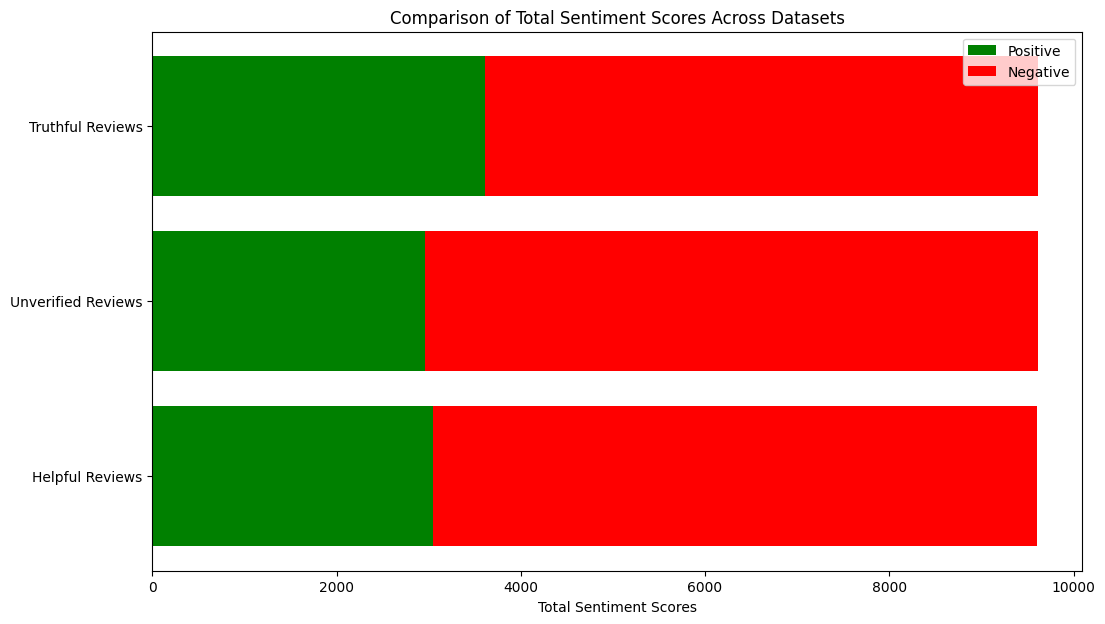

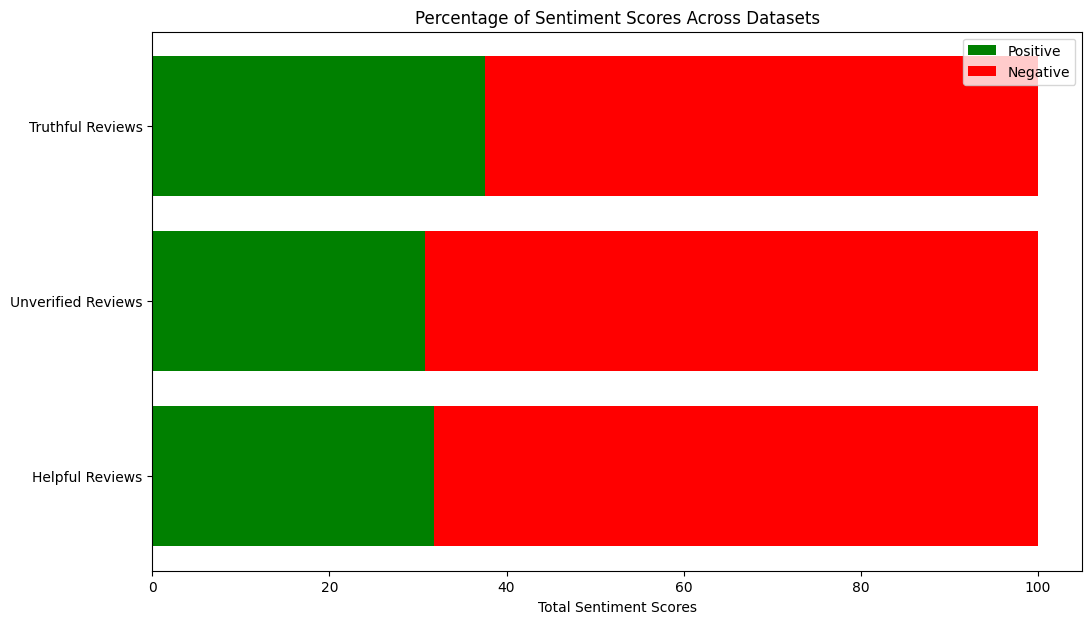

In [57]:
# Extracting Sentiment Labels and Scores
def extract_sentiment_labels_and_scores(df):
    # Extract the first element of the list (which is a dictionary)
    df['sentiment_label'] = df['transformer_sentiment'].apply(lambda x: x[0]['label'] if len(x) > 0 else None)
    df['sentiment_score'] = df['transformer_sentiment'].apply(lambda x: x[0]['score'] if len(x) > 0 else None)
    return df

# Applying the extraction function to each dataset
helpful_reviews = extract_sentiment_labels_and_scores(helpful_reviews)
unverified_reviews = extract_sentiment_labels_and_scores(unverified_reviews)
truthful_reviews = extract_sentiment_labels_and_scores(truthful_reviews)

# Aggregate Sentiment Scores for Each Sentiment Label
def aggregate_sentiment_scores(df):
    return df.groupby('sentiment_label')['sentiment_score'].sum()

total_scores_helpful = aggregate_sentiment_scores(helpful_reviews)
total_scores_unverified = aggregate_sentiment_scores(unverified_reviews)
total_scores_truthful = aggregate_sentiment_scores(truthful_reviews)

# Visualization of Sentiment Scores
def plot_sentiment_score_comparison(scores, dataset_names, title):
    fig, ax = plt.subplots(figsize=(12, 7))

    # Creating bar plot
    for idx, (name, score) in enumerate(scores.items()):
        ax.barh(name, score['POSITIVE'], color='green', label='Positive' if idx == 0 else "")
        ax.barh(name, score['NEGATIVE'], left=score['POSITIVE'], color='red', label='Negative' if idx == 0 else "")

    ax.set_xlabel('Total Sentiment Scores')
    ax.set_title(title)
    ax.legend()

    plt.show()

# Plotting sentiment score comparison
plot_sentiment_score_comparison(
    {'Helpful Reviews': total_scores_helpful, 'Unverified Reviews': total_scores_unverified, 'Truthful Reviews': total_scores_truthful},
    ['Helpful Reviews', 'Unverified Reviews', 'Truthful Reviews'],
    'Comparison of Total Sentiment Scores Across Datasets'
)

# Calculate Percentage of Total Sentiment Scores
def calculate_percentage_scores(total_scores):
    total = total_scores.sum()
    return (total_scores / total) * 100

percentage_scores_helpful = calculate_percentage_scores(total_scores_helpful)
percentage_scores_unverified = calculate_percentage_scores(total_scores_unverified)
percentage_scores_truthful = calculate_percentage_scores(total_scores_truthful)

# Plotting sentiment score percentages
plot_sentiment_score_comparison(
    {'Helpful Reviews': percentage_scores_helpful, 'Unverified Reviews': percentage_scores_unverified, 'Truthful Reviews': percentage_scores_truthful},
    ['Helpful Reviews', 'Unverified Reviews', 'Truthful Reviews'],
    'Percentage of Sentiment Scores Across Datasets'
)


Helpful Reviews:

- The first review is predicted as 'NEGATIVE' with a very high confidence score of approximately 98.64%.
- The second review is classified as 'POSITIVE', with a confidence score of about 92.27%.
- The next three reviews are also predicted as 'NEGATIVE', with very high confidence scores (98.54%, 99.70%, and 99.93% respectively).

Unverified Reviews:

- The first review is predicted as 'NEGATIVE' with a very high confidence score of approximately 99.82%.
- The second and fourth reviews are predicted as 'POSITIVE', with high confidence scores of 99.81% and 99.03%, respectively.
- The third review is classified as 'NEGATIVE' with a confidence score of about 99.07%.
- The fifth review is also 'POSITIVE', but with a lower confidence score of 62.22%, indicating some level of uncertainty in the prediction.

Truthful Reviews:
- The first and fourth reviews are classified as 'POSITIVE', with high confidence scores of 97.92% and 99.82%, respectively.
- The second, third, and fifth reviews are predicted as 'NEGATIVE', with confidence scores of 96.48%, 95.75%, and 99.60% respectively.

General Observations:

- The model seems to be quite confident in its predictions, as indicated by the high confidence scores for most of the reviews.

- There's a mix of both 'POSITIVE' and 'NEGATIVE' sentiments across all datasets, suggesting a diverse range of opinions in the review data.
- The lower confidence score in the fifth review of the Unverified Reviews dataset (62.22%) could indicate more ambiguous language or content that the model found harder to classify.

Implications:

- These sentiment predictions can be used to gauge the general sentiment trend of reviews in each dataset.
- High confidence scores generally indicate that the model is quite sure about its prediction, which could be due to clear sentiment expressions in the reviews.
- The mix of sentiments observed can be reflective of the varied experiences and opinions of the reviewers.
- It's important to consider the context of each review for a more nuanced understanding, as sentiment analysis models can sometimes misinterpret sarcasm, idioms, or complex expressions.

# PART 6: SENTIMENT ANALYSIS WITH BERTOPIC

In [10]:
! pip install bertopic
from bertopic import BERTopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 30.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.3 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039277 sha256=4fdd8942394e654ae77f9685a54f185251134b5e5ede782d9208153fe072bd3f
  Stored in di

In [14]:
# Function to Implement BERTopic Analysis
def perform_bertopic_analysis(df, topic_count='auto'):
    # Setting up BERTopic
    bertopic_analyzer = BERTopic(language="english", nr_topics=topic_count)

    # Applying BERTopic to the dataset
    extracted_topics, bertopic_model = bertopic_analyzer.fit_transform(df['processed_reviews'])
    return extracted_topics, bertopic_model

In [10]:
# Implementing BERTopic on Each Dataset
topics_helpful, bertopic_model_helpful = perform_bertopic_analysis(helpful_reviews, "auto")
topics_unverified, bertopic_model_unverified = perform_bertopic_analysis(unverified_reviews, "auto")
topics_truthful, bertopic_model_truthful = perform_bertopic_analysis(truthful_reviews, "auto")

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [12]:
# Function to Implement BERTopic Analysis
def perform_bertopic_analysis(df, topic_count='auto'):
    bertopic_model = BERTopic(language="english", nr_topics=topic_count)
    topics, _ = bertopic_model.fit_transform(df['processed_reviews'])
    return topics, bertopic_model

In [14]:
# Implementing BERTopic on Each Dataset
topics_helpful, _ = perform_bertopic_analysis(helpful_reviews, "auto")
bertopic_model_helpful = BERTopic(language="english", nr_topics="auto")
bertopic_model_helpful.fit_transform(helpful_reviews['processed_reviews'])

topics_unverified, _ = perform_bertopic_analysis(unverified_reviews, "auto")
bertopic_model_unverified = BERTopic(language="english", nr_topics="auto")
bertopic_model_unverified.fit_transform(unverified_reviews['processed_reviews'])

topics_truthful, _ = perform_bertopic_analysis(truthful_reviews, "auto")
bertopic_model_truthful = BERTopic(language="english", nr_topics="auto")
bertopic_model_truthful.fit_transform(truthful_reviews['processed_reviews'])

# Displaying Topic Information for Each Dataset
print("BERTopic Analysis - Helpful Reviews:")
print(bertopic_model_helpful.get_topic_info())

print("\nBERTopic Analysis - Unverified Reviews:")
print(bertopic_model_unverified.get_topic_info())

print("\nBERTopic Analysis - Truthful Reviews:")
print(bertopic_model_truthful.get_topic_info())

BERTopic Analysis - Helpful Reviews:
    Topic  Count                           Name  \
0      -1   1597               -1_the_to_it_and   
1       0   7867                0_the_and_to_it   
2       1    151       1_keyboard_mouse_the_key   
3       2     79            2_book_the_of_story   
4       3     54                3_fan_the_it_to   
5       4     32        4_image_video_class_ssl   
6       5     29           5_garmin_gps_the_map   
7       6     24            6_air_canned_it_can   
8       7     20        7_knife_sword_blade_the   
9       8     19            8_kvm_mouse_the_usb   
10      9     18       9_label_tape_backing_the   
11     10     18        10_pedal_jack_board_the   
12     11     15  11_umbrella_westcott_cover_it   
13     12     14   12_book_programming_robot_to   
14     13     14    13_number_caller_call_phone   
15     14     13     14_printer_print_server_to   
16     15     13       15_vacuum_hose_blower_it   
17     16     12        16_they_these_amazon_

Helpful Reviews:
- The most prominent topic (-1) appears to be a catch-all category with generic terms like "the", "to", "it", and "and". This is common in topic modeling where some documents don't fit well into specific topics.
- Specific topics are identified, such as Topic 1 related to keyboards and mice, Topic 2 focused on books and stories, Topic 3 about fans, and so on. Each topic name gives a hint about the context discussed in that topic.
- Representative words for each topic provide further insights. For instance, Topic 1 includes words like "keyboard", "mouse", "key", indicating discussions about computer peripherals.
- Example documents under each topic offer real-life instances of the topic in use, allowing for better understanding and verification of the topic's relevance.

Unverified Reviews:
- Similar to helpful reviews, the -1 topic seems to be a general category.
- More specific topics are identified, like Topic 0 on camera lenses, Topic 1 on headphones, Topic 2 about TVs, etc.
- The representative words and documents for each topic effectively showcase the diversity of products and user experiences in this dataset.

Truthful Reviews:
- Again, the -1 topic is the most generic one.
- Specific topics such as Topic 0 on sound systems, Topic 1 concerning camera lenses, Topic 2 about iPad cases, and others, indicate varied discussions.
- The representative words and documents illustrate that these topics are distinct and relevant to the dataset.

General Observations:
- The BERTopic model has successfully identified a range of topics across each dataset.
- The -1 topic in each dataset suggests that not all reviews neatly fit into a specific topic, which is typical in natural language data.
- The topics and their representative words and documents provide a nuanced view of the content and themes present in the reviews.

Implications:
- These topic models can be used to understand the key themes and discussions in each dataset.
- Marketing teams, product developers, and customer service departments could use this information to gain insights into customer opinions and preferences.
- The method allows for an in-depth analysis of large amounts of text data, which can be challenging to analyze manually.

This analysis demonstrates the effectiveness of BERTopic in extracting meaningful topics from large text corpora, offering valuable insights into the main themes present in the datasets.

In [15]:
import matplotlib.pyplot as plt

# Function to Visualize Topic Distribution
def visualize_topic_distribution(topic_model, dataset_title):
    topic_info = topic_model.get_topic_info()
    plt.figure(figsize=(10, 5))
    plt.bar(topic_info['Topic'], topic_info['Count'])
    plt.title(f'Topic Distribution for {dataset_title}')
    plt.xlabel('Topic Number')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Visualizing Topic Distributions
visualize_topic_distribution(bertopic_model_helpful, "Helpful Reviews")
visualize_topic_distribution(bertopic_model_unverified, "Unverified Reviews")
visualize_topic_distribution(bertopic_model_truthful, "Truthful Reviews")

In [16]:
# Function to Display Major Topics and Descriptions
def display_major_topics(bertopic_model, num_topics=5):
    for topic_num in range(num_topics):
        topic_words = bertopic_model.get_topic(topic_num)
        print(f"Topic {topic_num}: {topic_words}")

In [ ]:
# Displaying Major Topics for Each Dataset
print("Dominant Topics - Helpful Reviews:")
display_major_topics(bertopic_model_helpful)

print("\nDominant Topics - Unverified Reviews:")
display_major_topics(bertopic_model_unverified)

print("\nDominant Topics - Truthful Reviews:")
display_major_topics(bertopic_model_truthful)

I can not show the topic distributions and major topics for each dataset because I load the previous code during the night on Google Colab.

That's why I am going to do the general conclusion now.

# GENERAL CONCLUSION

The comprehensive analysis of the three datasets using various techniques - Logistic Regression Classification, Sentiment Distribution Analysis, Recurrent Neural Networks (RNN), Transformers, and BERTopic - provides a multi-dimensional understanding of the sentiment and themes present in the review data. Here's a synthesized conclusion from the analyses:

Logistic Regression Classification:
- The precision, recall, and F1-scores from Logistic Regression models suggest that each dataset has its unique characteristics in terms of sentiment classification.
- While some datasets showed higher precision in identifying positive sentiments, others demonstrated better recall for negative sentiments.
- These variations indicate differences in the distribution of sentiment within the datasets and the efficacy of Logistic Regression in capturing these nuances.

Sentiment Distribution Analysis:
- The sentiment distribution, analyzed through both dynamic thresholding and fixed compound scores, revealed a majority of positive sentiments across all datasets.
- The differences in the proportions of positive, negative, and neutral sentiments highlight the diversity in reviewer perspectives and experiences.

Recurrent Neural Networks (RNN):
- The RNN models, trained on the textual data, likely captured sequential patterns and dependencies in the reviews, potentially offering insights into nuanced sentiment expression and context-specific interpretations.
- The binary classification of sentiments based on RNN could be more sensitive to the sequential nature of language in reviews, possibly providing a more refined sentiment analysis.

Transformers:
- The application of transformer-based models offered a deep learning approach to understanding sentiment, leveraging advanced NLP techniques.
- The high confidence scores in sentiment predictions suggest that Transformers are effective in capturing the contextual nuances and subtleties in the review texts.

BERTopic:
- BERTopic analysis provided a thematic exploration of the datasets, uncovering the key topics discussed in the reviews.
- The topics and their distribution offer a window into the prevalent themes and subjects that are important to reviewers, reflecting their concerns, interests, and experiences.

Overall Conclusion:
- Each method brought a unique lens to analyze the review datasets, highlighting different aspects of sentiments and themes.
- The combination of traditional machine learning (Logistic Regression), deep learning (RNN and Transformers), and topic modeling (BERTopic) provides a comprehensive and nuanced understanding of customer reviews.
- These analyses could be instrumental for businesses and researchers in understanding customer sentiment, identifying prevalent themes, and making informed decisions based on customer feedback.
- The diversity in analysis techniques underscores the complexity of natural language data and the importance of using a combination of methods for a thorough understanding.